In [96]:
import json
import copy

# Tokenize the text into words, convert to lowercase and count the occurrences
from collections import Counter
import re
from collections import defaultdict


with open("user1.json", 'r') as f:
    data = json.load(f)

json_list = [d for d in data]
print(len(json_list))

1000


In [88]:

themes = defaultdict(int)

for d in data:
    themes[d['theme']] += 1


In [ ]:
sorted_items = sorted(themes.items(), key=lambda x: x[1], reverse=True)


for t in sorted_items:
    print(t)

In [98]:
for d in data:
    d['chosen'] = ""
user2 = copy.deepcopy(data)
user3 = copy.deepcopy(data)
user4 = copy.deepcopy(data)


In [125]:
file = []
with open("cache.txt", "r") as f:
    for line in f:
        file.append(line)

In [ ]:
dic = {}
for f in file:
    dic[f.split(",")[0][1:-1]] = f.split(",")[2].split()
dic['A: Gym. B: Classes, Rock Climbing'] = ['2', '1', '1']
dic['A: Reduce, reuse, recycle. B: Support Local'] = ['1', '1', '2']
dic

In [127]:


for d in user2:
    d['chosen'] = dic[d['theme']][0]

for d in user3:
    d['chosen'] = dic[d['theme']][1]
    
for d in user4:
    d['chosen'] = dic[d['theme']][2]


In [130]:
with open("user2.json", "w") as f:
    json.dump(user2, f)
    
with open("user3.json", "w") as f:
    json.dump(user3, f)

with open("user4.json", "w") as f:
    json.dump(user4, f)


In [150]:
with open("user1.json", "r") as f:
    user1 = json.load(f)
    
    
user1_choices = [int(d['chosen']) for d in user1]
user2_choices = [int(d['chosen']) for d in user2]
user3_choices = [int(d['chosen']) for d in user3]
user4_choices = [int(d['chosen']) for d in user4]

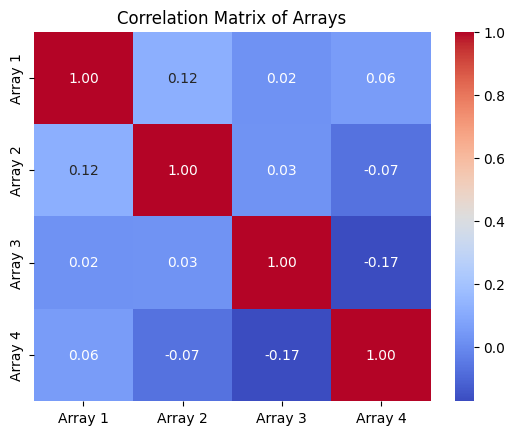

In [163]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Example arrays with values either 1 or 2
array1 = np.array(user1_choices)
array2 = np.array(user2_choices)
array3 = np.array(user3_choices)
array4 = np.array(user4_choices)

# Combine these arrays into a single 2D numpy array
data = np.array([array1, array2, array3, array4])

# Compute the correlation matrix
correlation_matrix = np.corrcoef(data)

# Plotting the correlation matrix using seaborn's heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", xticklabels=['Array 1', 'Array 2', 'Array 3', 'Array 4'], yticklabels=['Array 1', 'Array 2', 'Array 3', 'Array 4'])
plt.title('Correlation Matrix of Arrays')
plt.show()

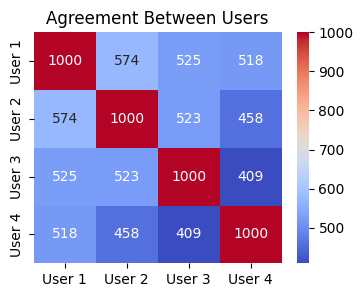

In [258]:

# Function to calculate Hamming distance
def hamming_distance(arr1, arr2):
    if len(arr1) != len(arr2):
        raise ValueError("Arrays must be of the same length")
    return 1000 - np.sum(arr1 != arr2)

# Create a matrix of Hamming distances
users = [array1, array2, array3, array4]
hamming_matrix = np.zeros((len(users), len(users)))

for i in range(len(users)):
    for j in range(len(users)):
        hamming_matrix[i, j] = hamming_distance(users[i], users[j])
fig, ax = plt.subplots(figsize=(4, 3))  # Adjust the size to fit 4x10 boxes properly

# Plotting the heatmap
sns.heatmap(hamming_matrix, annot=True, fmt=".0f", cmap='coolwarm',
            xticklabels=['User 1', 'User 2', 'User 3', 'User 4'],
            yticklabels=['User 1', 'User 2', 'User 3', 'User 4'])
plt.title('Agreement Between Users')
plt.savefig("gen_user_agreement.pdf", format="pdf")
plt.show()

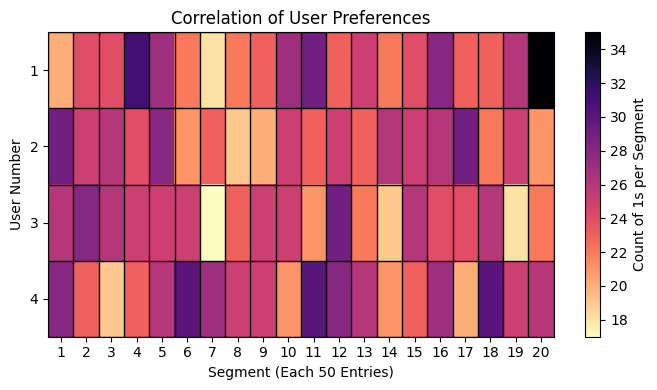

In [257]:
from matplotlib.colors import ListedColormap
# Now, we will count the number of times each user chose '1' in each segment of 100 entries.
counts = []
for choices in [user1_choices, user2_choices, user3_choices, user4_choices]:
    count = [np.sum(choices[i:i+50] == 1) for i in range(0, 1000, 50)]
    counts.append(count)

# Convert the counts list to a NumPy array for easier plotting
count_array = np.array(counts)

# Plotting the heatmap with counts of '1's
fig, ax = plt.subplots(figsize=(7, 4))  # Adjust the size to fit 4x10 boxes properly

cmap = ListedColormap(['#FF0000', '#0000FF'])  
cmap = plt.cm.magma_r


# We use imshow to plot the heatmap. Note that we need to transpose the array to have the users on the y-axis.
# cbar = ax.imshow(count_array, cmap='Blues', aspect='auto')
cbar = ax.imshow(count_array, cmap=cmap, aspect='auto')


# Set the colorbar to show labels
plt.colorbar(cbar, label='Count of 1s per Segment')

# Set the tick labels
ax.set_xticks(np.arange(count_array.shape[1]))
ax.set_yticks(np.arange(count_array.shape[0]))
ax.set_xticklabels(np.arange(1, count_array.shape[1] + 1))
ax.set_yticklabels(['1', '2', '3', '4'])

# Adding gridlines for better visualization
ax.set_yticks(np.arange(count_array.shape[0]+1)-.5, minor=True)
ax.set_xticks(np.arange(count_array.shape[1]+1)-.5, minor=True)
ax.grid(which="minor", color="black", linestyle='-', linewidth=1)
ax.tick_params(which="minor", size=0)

# Additional settings for clarity
plt.title('Correlation of User Preferences')
plt.ylabel('User Number')
plt.xlabel('Segment (Each 50 Entries)')

plt.tight_layout()  # Adjust the padding between and around subplots.

plt.savefig("gen_user_prefs.pdf", format="pdf")
plt.show()

[[100.   57.4  52.5  51.8]
 [ 57.4 100.   52.3  45.8]
 [ 52.5  52.3 100.   40.9]
 [ 51.8  45.8  40.9 100. ]]


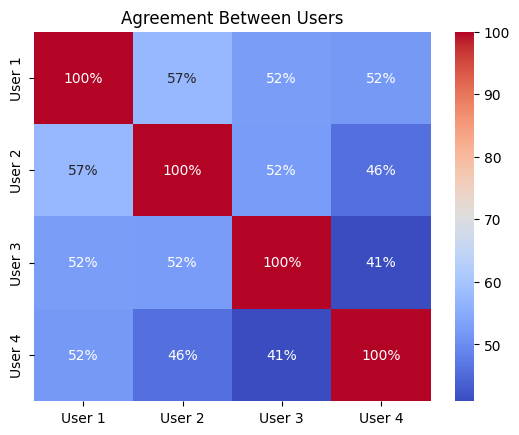

In [250]:

# Function to calculate Hamming distance and convert it to percentage
def hamming_distance(arr1, arr2):
    if len(arr1) != len(arr2):
        raise ValueError("Arrays must be of the same length")
    # Calculating Hamming distance as a percentage of differences
    return 100 * (np.sum(arr1 == arr2) / len(arr1))

# Example binary arrays for demonstration

# List of arrays representing users
users = [array1, array2, array3, array4]

# Create a matrix of Hamming distances in percentage
hamming_matrix = np.zeros((len(users), len(users)))

for i in range(len(users)):
    for j in range(len(users)):
        hamming_matrix[i, j] = hamming_distance(users[i], users[j])
print(hamming_matrix)


# Plotting the heatmap with percentage values
ax = sns.heatmap(hamming_matrix, annot=True, fmt=".0f", cmap='coolwarm',
            xticklabels=['User 1', 'User 2', 'User 3', 'User 4'],
            yticklabels=['User 1', 'User 2', 'User 3', 'User 4'])
for t in ax.texts: t.set_text(t.get_text() + "%")
plt.title('Agreement Between Users')


plt.show()